## About Dataset
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `dataset` (place of study)
* `sex` (Male/Female)
* `cp` Chest pain type: 
  1. typical angina 
  2. atypical angina 
  3. non-anginal 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute




## Aims and Objective:

**Aim:**\
To perform exploratory data analysis (EDA) and build a machine learning model that accurately predicts heart disease, helping in early detection and improving healthcare decisions.

**Objectives:**

- **Explore the Data:** Analyze the dataset to understand key patterns and relationships through EDA.
- **Feature Engineering:** Create or modify features to improve model accuracy.
- **Model Building:** Develop and compare various machine learning models.
- **Model Evaluation:** Measure model performance using accuracy, precision, recall, and F1-score.
- **Insights:** Identify the key factors contributing to heart disease and provide actionable insights.

## Import Libraries

Let's start the project by impoprting all the libraries that we will need in this project.


In [1]:
#To handle the data
import pandas as pd
import numpy as np



!pip install xgboost


# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
#pipeline
from sklearn.pipeline import Pipeline
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
#load the dataset placed in our local pc 
df = pd.read_csv('heart_disease_uci.csv')

#display the first 5 rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore the Dataset

In [3]:
#exploring data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
#data shape
df.shape

(920, 16)

### ID Column

In [5]:
#id column
df['id'].min(), df['id'].max()

(1, 920)

`id column is a unique identifier for each patient, it is not useful for our analysis.`

### Age Column

In [6]:
#age column
df['age'].min(), df['age'].max()

(28, 77)

` Observation: The minimum age of the patient is 28 years  `

In [7]:
# summarize age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

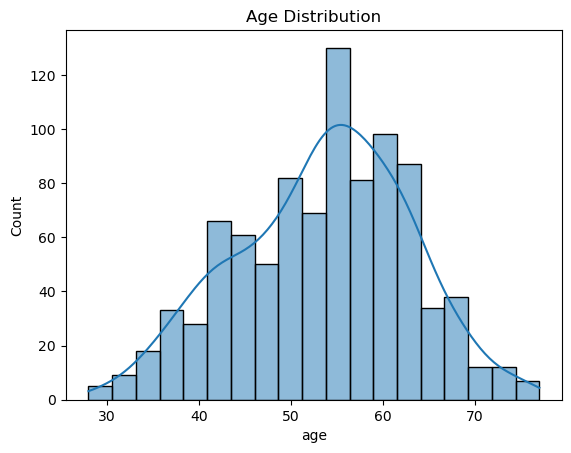

In [8]:
#histogram to see the distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

Mean: 53.51086956521739
Median: 54.0
Mode: 54


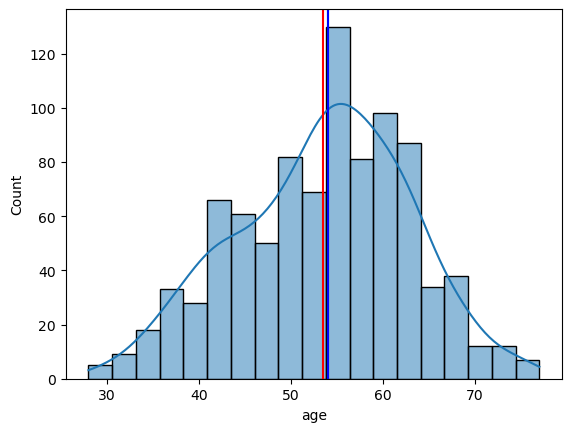

In [9]:
#mean, median, & mode of age column
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

### Explore Gender Distribution based on age

In [10]:
#histogram to see the distribution of gender on age using plotly
fig = px.histogram(df, x='age', color='sex')
fig.show()

### Sex Column

In [11]:
#value counts of gender
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [12]:
#Male & female percenatge in our dataset
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")


Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


### Dataset Column

In [13]:
#dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
#value counts in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [15]:
# Create a bar chart with counts
fig = px.bar(df, x='dataset', color='sex', barmode='group')

# Add counts as text labels
df_counts = df.groupby(['dataset', 'sex']).size().reset_index(name='count')
fig = px.bar(df_counts, x='dataset', y='count', color='sex', barmode='group', text='count')


fig.show()

In [16]:
#plot the distribution of age on dataset
fig = px.histogram(df, x='age', color='dataset')
fig.show()

#mean, median, & mode of age column on dataset column
print(f"Mean of age based on dataset: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of age based on dataset: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of age based on dataset: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")


Mean of age based on dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of age based on dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of age based on dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


### CP (Chest Pain) Column

In [17]:
#value counts of chest pain column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

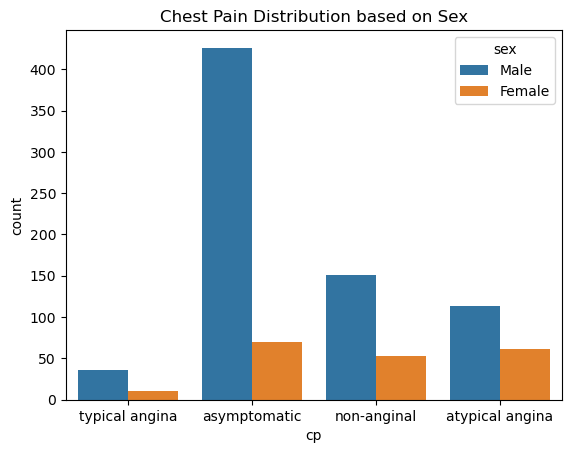

In [18]:
#plot the cp column using sns
sns.countplot(data=df, x='cp', hue='sex')
plt.title('Chest Pain Distribution based on Sex')
plt.show()

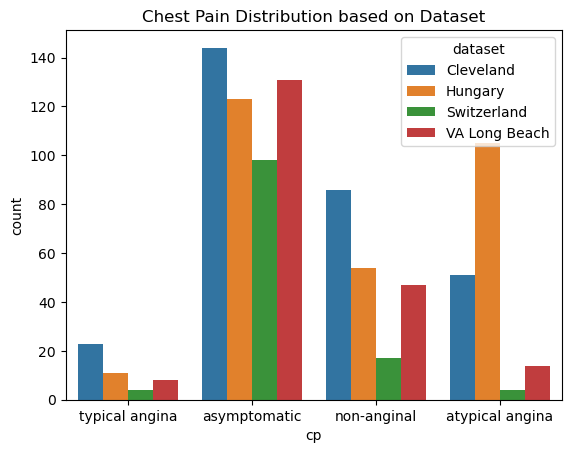

In [19]:
#plot the cp based on dataset column
sns.countplot(data=df, x='cp', hue='dataset')
plt.title('Chest Pain Distribution based on Dataset')
plt.show()

In [20]:
#plot the cp based on age column using plotly
fig = px.histogram(df, x='age', color='cp')
fig.show()

---

#### The remaining columns have missing values, we will fill them in the next step.

<span style="color: orange; font-size: 100%; font-weight: bold;">Dealing with missing values</span>

In [21]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [22]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [23]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [24]:
# Function to impute missing values for categorical data
def impute_categorical_missing_data(passed_col):
    # Split the dataframe into rows with and without missing values for the passed column
    df_null = df[df[passed_col].isnull()]  # Rows with missing values in passed_col
    df_not_null = df[df[passed_col].notnull()]  # Rows without missing values in passed_col

    # Separate features (X) and target (y) for non-missing rows
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    # Identify other columns with missing data (excluding the passed column)
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # Initialize label encoder for encoding categorical features
    label_encoder = LabelEncoder()

    # Encode all categorical columns in X
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    # Encode the target column if it's boolean
    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    # Initialize an iterative imputer with a RandomForestRegressor as the estimator
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # Impute missing values for other columns with missing data in X
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    # Split data into training and testing sets for training a classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a RandomForestClassifier on the data
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = rf_classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f"The feature '{passed_col}' has been imputed with {round(acc_score * 100, 2)}% accuracy\n")

    # Repeat preprocessing for the rows with missing values
    X = df_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    # Use the trained classifier to predict missing values
    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        # Decode boolean columns back to True/False
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})

    # Combine imputed rows with the original non-missing rows
    df_combined = pd.concat([df_not_null, df_null])

    # Return the imputed column
    return df_combined[passed_col]


# Function to impute missing values for continuous data
def impute_continuous_missing_data(passed_col):
    # Split the dataframe into rows with and without missing values for the passed column
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    # Separate features (X) and target (y) for non-missing rows
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    # Identify other columns with missing data (excluding the passed column)
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # Initialize label encoder for encoding categorical features
    label_encoder = LabelEncoder()

    # Encode all categorical columns in X
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    # Initialize an iterative imputer with a RandomForestRegressor as the estimator
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # Impute missing values for other columns with missing data in X
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    # Split data into training and testing sets for training a regressor
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a RandomForestRegressor on the data
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)

    # Predict and calculate performance metrics
    y_pred = rf_regressor.predict(X_test)
    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    # Repeat preprocessing for the rows with missing values
    X = df_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    # Use the trained regressor to predict missing values
    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)

    # Combine imputed rows with the original non-missing rows
    df_combined = pd.concat([df_not_null, df_null])

    # Return the imputed column
    return df_combined[passed_col]


In [25]:
# Identify columns with missing values in the DataFrame
# `df.isnull().sum()` calculates the total number of missing values for each column
# `[df.isnull().sum() > 0]` filters the columns to include only those with missing values
# `.sort_values(ascending=False)` sorts these columns in descending order by the number of missing values
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)


ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [26]:
#using our function to impute the missing values using for loop
# Iterate over each column in the list of columns with missing data
for col in missing_data_cols:
    # Print the percentage of missing values for the current column
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2)) + "%")
    
    # Check if the column is categorical
    if col in categorical_cols:
        # Impute missing values for categorical columns
        df[col] = impute_categorical_missing_data(col)
    
    # Check if the column is numeric
    elif col in numeric_cols:
        # Impute missing values for numeric columns
        df[col] = impute_continuous_missing_data(col)
    
    # If the column doesn't belong to either category, do nothing
    else:
        pass


Missing Values trestbps : 6.41%
MAE = 13.998571428571429 

RMSE = 19.000689633897675 

R2 = 0.06473528344415314 

Missing Values chol : 3.26%
MAE = 48.544194756554305 

RMSE = 67.78319150745509 

R2 = 0.6368944982818359 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.32% accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 62.68% accuracy

Missing Values thalch : 5.98%
MAE = 16.61826923076923 

RMSE = 21.374931911722413 

R2 = 0.3227471385946016 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.85% accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5586395348837209 

RMSE = 0.8089115497684758 

R2 = 0.43524541420473195 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.93% accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.67% accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.23% accuracy



In [27]:
#check if there are any missing values
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

`Missing values are imputed.`

---

<span style="color: orange; font-size: 200%; font-weight: bold;">Dealing with Outliers</span>

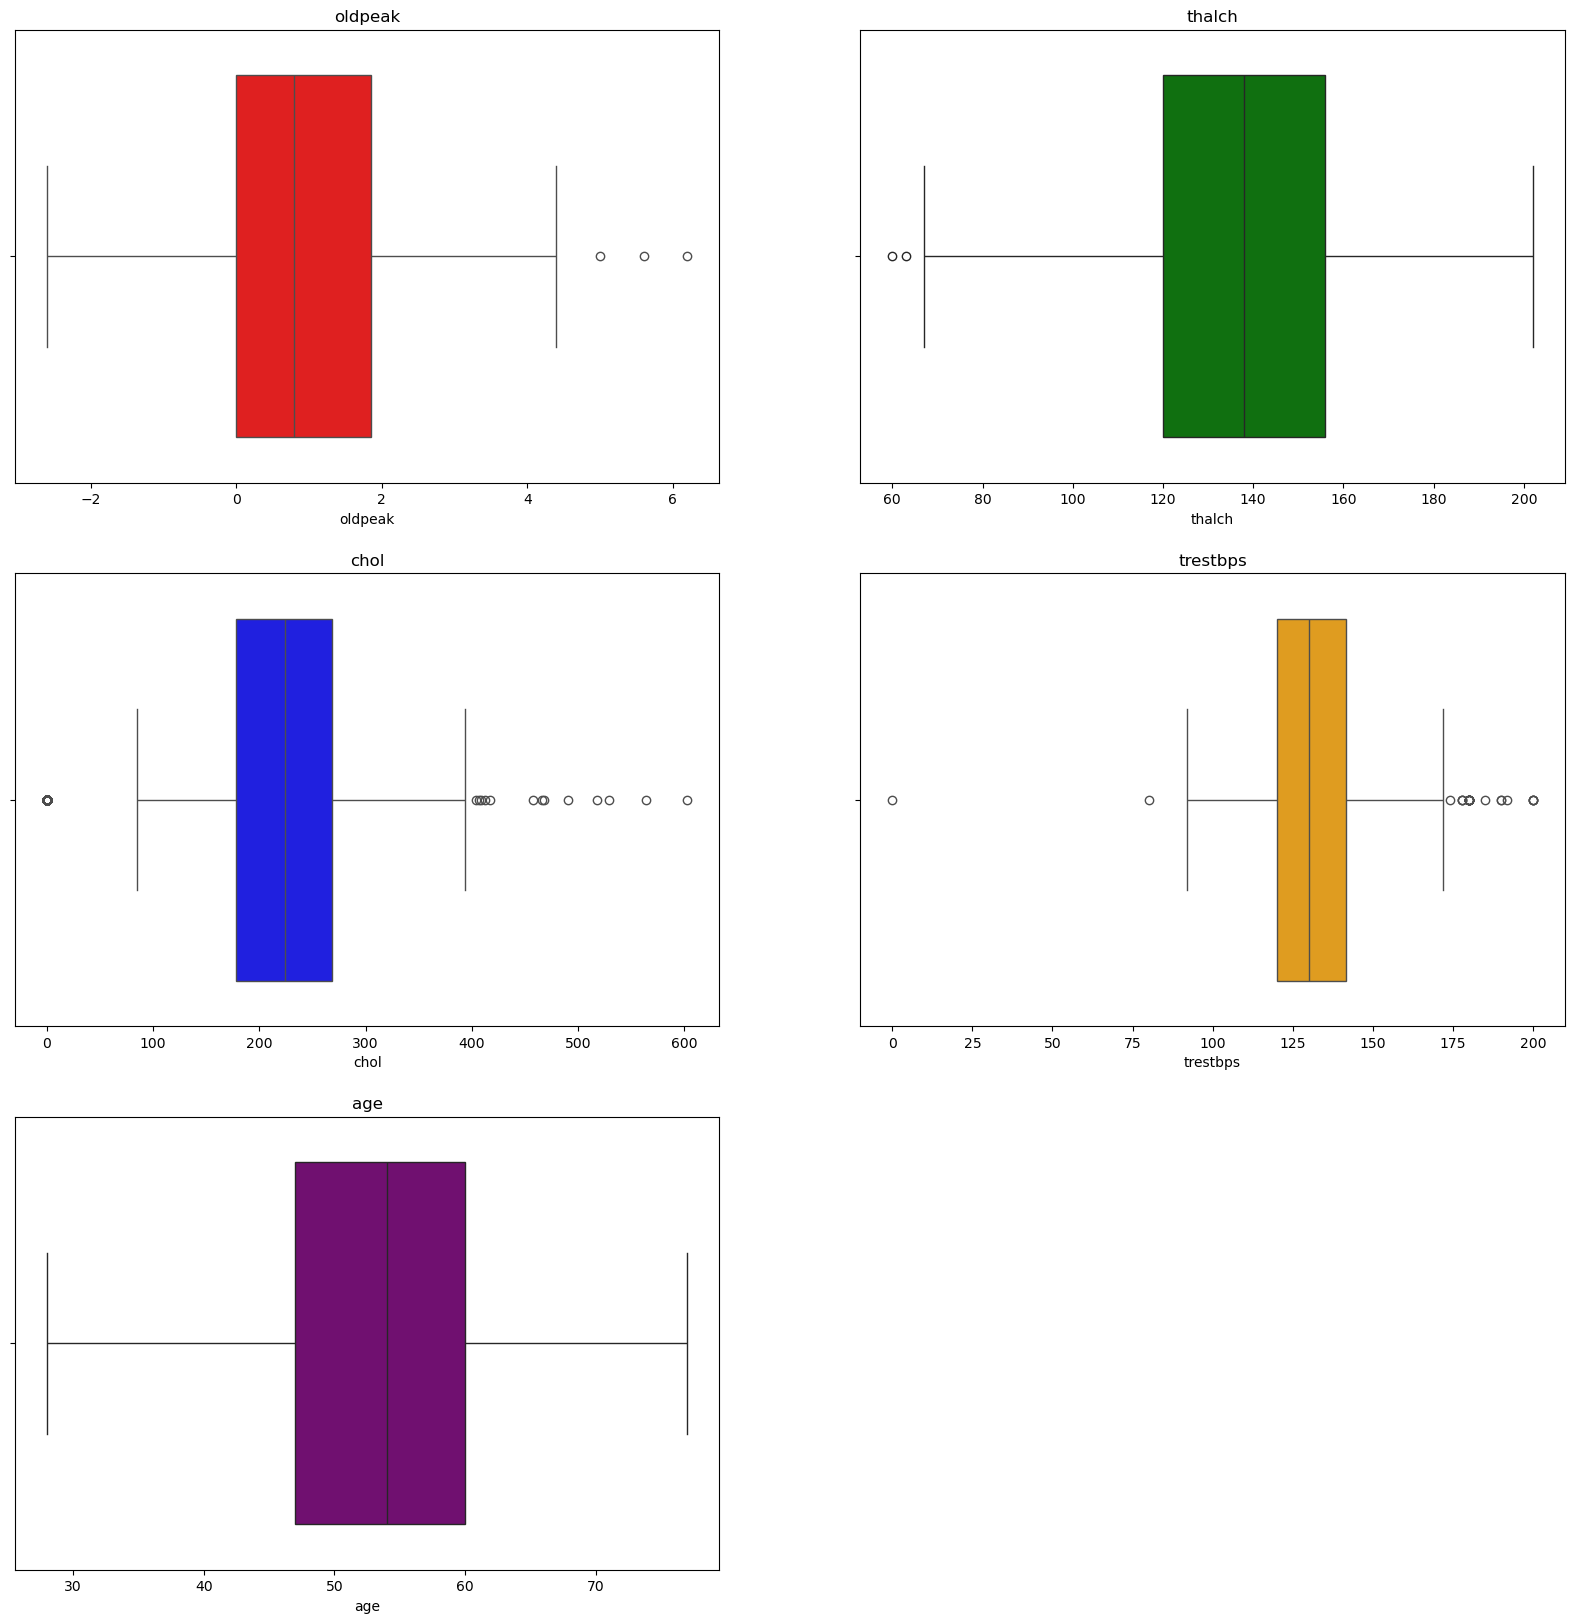

In [28]:
#box plot of all numeric columns using for loop
# Set the overall figure size for the plot
plt.figure(figsize=(20, 20))

# Define a list of colors to use for the boxplots
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Loop through each numeric column and plot its boxplot
for i, col in enumerate(numeric_cols):  # Enumerate provides both index (i) and column name (col)
    # Create a subplot for the current numeric column
    plt.subplot(3, 2, i + 1)  # Arrange subplots in a 3-row, 2-column grid (adjust as needed)
    
    # Generate a boxplot for the current numeric column
    sns.boxplot(x=df[col], color=colors[i])  # Use the specified color for the boxplot
    
    # Set the title of the current subplot to the column name
    plt.title(col)

# Display all the boxplots
plt.show()


In [29]:
#plot box plot for all numeric columns using for loop in plotly
# Create and display a box plot for the 'age' column
fig = px.box(df, y='age', title='Age Box Plot')  # Use Plotly Express to create a box plot for 'age'
fig.show()  # Display the plot

# Create and display a box plot for the 'trestbps' column (resting blood pressure)
fig = px.box(df, y='trestbps', title='Trestbps Box Plot')  # Box plot for 'trestbps' with a title
fig.show()  # Display the plot

# Create and display a box plot for the 'chol' column (cholesterol levels)
fig = px.box(df, y='chol', title='Chol Box Plot')  # Box plot for 'chol' with a title
fig.show()  # Display the plot

# Create and display a box plot for the 'thalch' column (maximum heart rate achieved)
fig = px.box(df, y='thalch', title='Thalach Box Plot')  # Box plot for 'thalch' with a title
fig.show()  # Display the plot

# Create and display a box plot for the 'oldpeak' column (ST depression induced by exercise)
fig = px.box(df, y='oldpeak', title='Oldpeak Box Plot')  # Box plot for 'oldpeak' with a title
fig.show()  # Display the plot




In [30]:
# defining a function for outlier treatment using z-score
def outlier_treatment(df , col):

    # Calculate the Z-scores for each value in the column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define the threshold for identifying outliers
    threshold = 3

    # identify rows where any column has a Z-score above the threshold
    outliers = (z_scores > threshold)

    # the number of rows identified as outliers
    print(f'Number of rows identified as outliers in {col}: {outliers.sum()}')

    # Remove the outliers
    df = df[~outliers]

    # print statement
    print('Z score has been successfully applied on {}.'.format(col))
    
    # returning the dataframe
    return df

In [31]:
# aaplying outlier_treatment function on trestbps
df = outlier_treatment(df , 'trestbps')

Number of rows identified as outliers in trestbps: 8
Z score has been successfully applied on trestbps.


In [32]:
# aaplying outlier_treatment function on chol
df = outlier_treatment(df , 'chol')

Number of rows identified as outliers in chol: 3
Z score has been successfully applied on chol.


In [33]:
# # Dropping rows where 'trestbps' or 'chol' are 0, as these values are not medically possible.
df = df[df['chol'] != 0]

In [34]:
# check the row where trestbps is 0
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [35]:
# Remove the row where trestbps is not equal to zero
df=df[df['trestbps']!=0]
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [36]:
df.info() # Provides the details abou the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        740 non-null    int64  
 1   age       740 non-null    int64  
 2   sex       740 non-null    object 
 3   dataset   740 non-null    object 
 4   cp        740 non-null    object 
 5   trestbps  740 non-null    float64
 6   chol      740 non-null    float64
 7   fbs       740 non-null    object 
 8   restecg   740 non-null    object 
 9   thalch    740 non-null    float64
 10  exang     740 non-null    object 
 11  oldpeak   740 non-null    float64
 12  slope     740 non-null    object 
 13  ca        740 non-null    float64
 14  thal      740 non-null    object 
 15  num       740 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 98.3+ KB


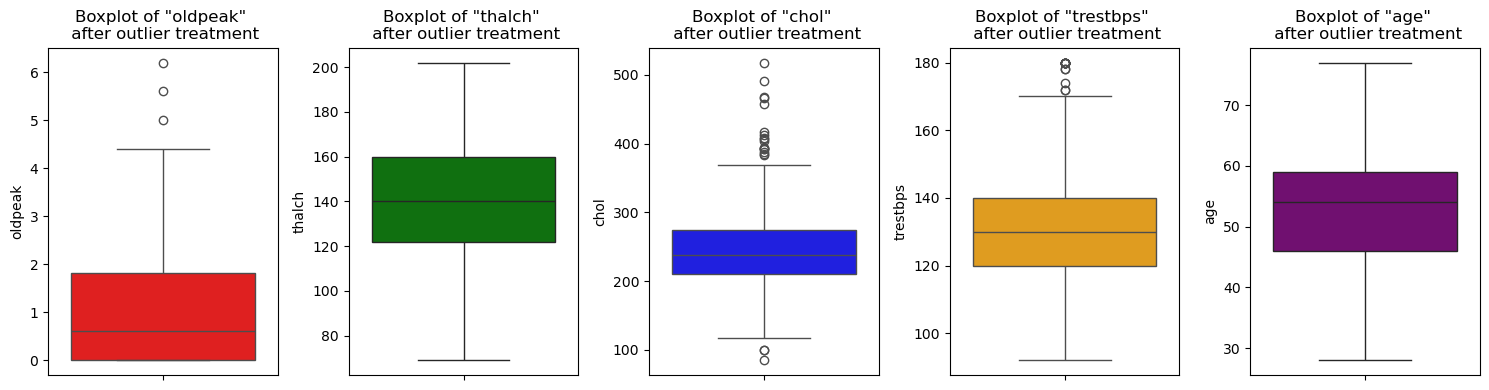

In [37]:
# setting up the figure size
plt.figure(figsize=(15, 4))
colors = ['red', 'green', 'blue', 'orange', 'purple']

# loop through each column
for i in range(len(numeric_cols)):
    # create a subplot
    plt.subplot(1, len(numeric_cols), i + 1)
    # plotting the boxplot
    sns.boxplot(y=df[numeric_cols[i]], color=colors[i])
    # adding title
    plt.title(f'Boxplot of "{numeric_cols[i]}" \n after outlier treatment')

plt.tight_layout()

plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        740 non-null    int64  
 1   age       740 non-null    int64  
 2   sex       740 non-null    object 
 3   dataset   740 non-null    object 
 4   cp        740 non-null    object 
 5   trestbps  740 non-null    float64
 6   chol      740 non-null    float64
 7   fbs       740 non-null    object 
 8   restecg   740 non-null    object 
 9   thalch    740 non-null    float64
 10  exang     740 non-null    object 
 11  oldpeak   740 non-null    float64
 12  slope     740 non-null    object 
 13  ca        740 non-null    float64
 14  thal      740 non-null    object 
 15  num       740 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 98.3+ KB


## Let's Continue our EDA(Exploratory Data Analysis)

#### Resting Blood Pressure (trestbps) Column

`The normal resting blood pressure is 120/80 mm Hg.`

1. High BP (Hypertension): Can lead to heart disease, stroke.
2. Low BP (Hypotension): May cause dizziness, fainting.

In [39]:
#summary statistics of trestbps column
df['trestbps'].describe()

count    740.000000
mean     132.842797
std       16.681020
min       92.000000
25%      120.000000
50%      130.000000
75%      140.067500
max      180.000000
Name: trestbps, dtype: float64

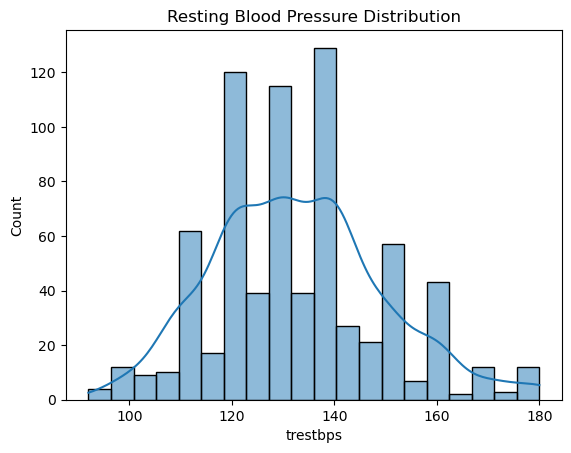

In [40]:
#histogram of trestbps column
sns.histplot(df['trestbps'], kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

In [41]:
# Count the occurrences of each unique value in the 'trestbps' column
# `df['trestbps'].value_counts()` returns a Series where the index is the unique values 
# and the values are their respective counts

# `.nlargest(5)` selects the top 5 most frequent values from the count Series
df['trestbps'].value_counts().nlargest(5)

trestbps
120.0    110
130.0    100
140.0     90
150.0     49
110.0     47
Name: count, dtype: int64

`Observation: Majority of the Patients have Resting Blood pressure ranges from 110-150 mm Hg. `

In [42]:
#Plot the distribution of trestbps based on gender
fig = px.histogram(df, x='trestbps', color='sex')
fig.show()



`According to our dataset, Females have higher resting blood pressure as compared to males.`

### Chol Column

`The normal cholesterol level is less than 200 mg/dL.`

In [43]:
# Generate descriptive statistics for the 'chol' column
# `df['chol'].describe()` provides a summary of key statistics for numerical data:
# - Count: The number of non-null entries in the column
# - Mean: The average value of the data
# - Std: The standard deviation, indicating the spread of the data
# - Min: The minimum value in the column
# - 25%, 50%, 75%: The quartiles of the data (percentiles
# - Max: The maximum value in the column
df['chol'].describe()

count    740.000000
mean     245.445797
std       54.320612
min       85.000000
25%      211.000000
50%      238.000000
75%      275.000000
max      518.000000
Name: chol, dtype: float64

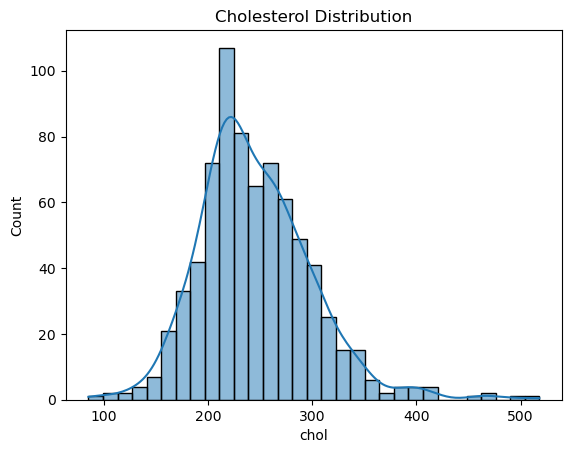

In [44]:
#plot the chol column
# `sns.histplot()` generates the histogram, showing the frequency of cholesterol values
# `kde=True` adds a Kernel Density Estimate (KDE) curve to indicate the probability density

sns.histplot(df['chol'], kde=True)

# Set the title for the plot to provide context
plt.title('Cholesterol Distribution')

# Display the plot
plt.show()


In [45]:
# Count the occurrences of each unique value in the 'chol' column
# `df['chol'].value_counts()` returns a Series where the index represents unique values 
# and the values are their respective counts in descending order.

# `.nlargest(5)` retrieves the top 5 most frequent values from the count Series
df['chol'].value_counts().nlargest(5)


chol
254.0    10
220.0    10
223.0     9
230.0     9
204.0     9
Name: count, dtype: int64

`observation: The majority of the patients have cholesterol levels between 200-300 mg/dl. Which is slightly higher than the normal range.`

In [46]:
#Age Column binning
df['age_bins'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, 80], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80'])


In [47]:
# Count the occurrences of each unique value in the 'age_bins' column
# `df['age_bins'].value_counts()` returns a Series where the index represents unique age bins 
# and the values are the counts of records in each bin.

df['age_bins'].value_counts()


age_bins
51-60    301
41-50    202
61-70    138
31-40     74
71-80     20
0-30       5
Name: count, dtype: int64

In [48]:
df.columns # Displays all the columns in the Dataset

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'age_bins'],
      dtype='object')

<Axes: xlabel='age_bins', ylabel='chol'>

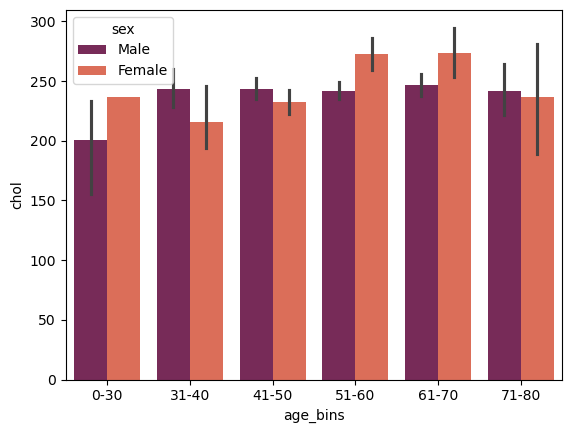

In [49]:
# Create a bar plot to visualize the relationship between 'age_bins' and 'chol' (cholesterol levels)
# `sns.barplot()` generates a bar plot with categorical data on the x-axis and numerical data on the y-axis

# Parameters:
# - `data=df`: Specifies the DataFrame to use.
# - `x='age_bins'`: Sets the 'age_bins' column as the categorical variable for the x-axis.
# - `y='chol'`: Sets the 'chol' column as the numerical variable for the y-axis.
# - `hue='sex'`: Differentiates the bars by 'sex' (gender) using different colors for each category.
# - `palette='rocket'`: Uses the 'rocket' color palette for coloring the bars.

sns.barplot(data=df, x='age_bins', y='chol', hue='sex', palette='rocket')


In [50]:
#which category has the highest cholestrol
df.groupby('age_bins')['chol'].median().sort_values(ascending=False)


age_bins
61-70    253.000
51-60    239.000
41-50    235.000
71-80    226.725
0-30     223.900
31-40    223.000
Name: chol, dtype: float64

`The cholesterol level is highest among the age group of 61-70 years.`

### FBS Column

fbs column tells us about the fasting blood sugar levels of the patients.



In [51]:
# Count the occurrences of each unique value in the 'fbs' column
# `df['fbs'].value_counts()` returns a Series where the index represents unique values 
# (such as 0 or 1, for the binary feature 'fbs') and the values are the respective counts.

df['fbs'].value_counts()

fbs
False    621
True     119
Name: count, dtype: int64

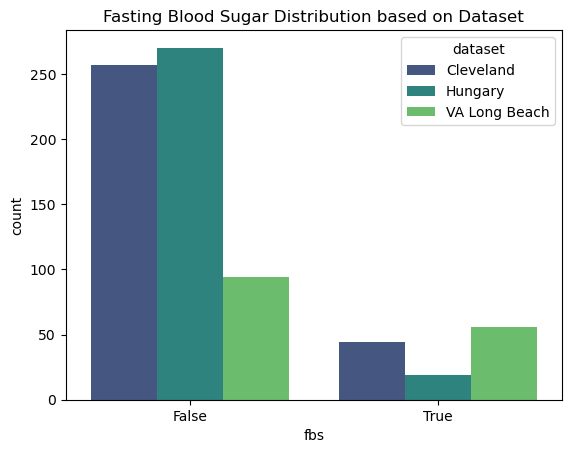

In [52]:
#make a good plot of fbs column using sns
# Create a count plot to visualize the distribution of 'fbs' (fasting blood sugar)
# `sns.countplot()` creates a count plot showing the number of occurrences of each unique value in the 'fbs' column

# Parameters:
# - `data=df`: Specifies the DataFrame to use for the plot.
# - `x='fbs'`: Plots the categorical variable 'fbs' (fasting blood sugar levels) on the x-axis.
# - `hue='dataset'`: Differentiates the bars by the 'dataset' column, coloring the bars based on the 'dataset' variable.
# - `palette='viridis'`: Uses the 'viridis' color palette for visualizing the bars.

sns.countplot(data=df, x='fbs', hue='dataset', palette='viridis')

# Set the title for the plot to describe what is being visualized
plt.title('Fasting Blood Sugar Distribution based on Dataset')

# Display the plot
plt.show()


`Observation: The majority of the patients have fasting blood sugar levels less than 120 mg/dl.`

### Restecg Column

In [53]:
# Count the occurrences of each unique value in the 'restecg' column
# `df['restecg'].value_counts()` returns a Series where the index represents unique values
# (such as 0, 1, or 2, for the 'restecg' column) and the values are the respective counts.

df['restecg'].value_counts()

restecg
normal              441
lv hypertrophy      173
st-t abnormality    126
Name: count, dtype: int64

1. `Normal:`A healthy ECG reading with no signs of heart problems.

2. `LV Hypertrophy:` Thickening of the heart's left side, which can happen when the heart works too hard.

3. `ST-T Abnormality:` Unusual patterns in part of the ECG that may point to heart issues like reduced blood flow or heart attack.

In [54]:
#plot restecg using plotly count plot
fig = px.histogram(df, x='age_bins', color='restecg', barmode='group', title='Resting ECG Results Based on Age')
fig.show()

`Observation: According to our dataset, majority of the patients have normal Resting ECG but some patients have ST-T wave abnormality. which may indicate heart issues.`

### Thalch Column

In [55]:
# Count the occurrences of each unique value in the 'thalch' column
# `df['thalch'].value_counts()` returns a Series where the index represents unique values 
# (such as different heart rate values) and the values are the respective counts.

# `.nlargest(5)` selects the top 5 most frequent values from the count Series
df['thalch'].value_counts().nlargest(5)

thalch
150.0    38
140.0    37
130.0    25
160.0    24
120.0    21
Name: count, dtype: int64

age_bins
0-30     177.400000
31-40    157.449595
41-50    146.339703
51-60    136.956478
61-70    129.483261
71-80    120.874000
Name: thalch, dtype: float64


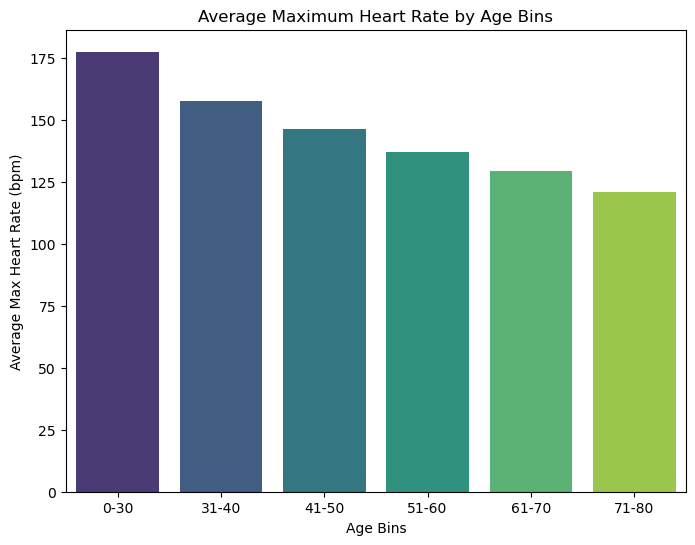

In [56]:
#groupby thalch based on age_bins
# Calculate the average 'thalch' (maximum heart rate) for each 'age_bins' category
# `df.groupby('age_bins')` groups the data by the 'age_bins' column.
# `.mean()` calculates the mean of the 'thalch' values within each age bin.
# `.sort_values(ascending=False)` sorts the resulting averages in descending order to show the highest heart rates first.

average_thalch = df.groupby('age_bins')['thalch'].mean().sort_values(ascending=False)

# Print the average maximum heart rate for each age bin
print(average_thalch)

# Plotting the results
# Create a figure with the specified size
plt.figure(figsize=(8, 6))

# Create a bar plot with 'age_bins' on the x-axis and the calculated average heart rates on the y-axis
# `sns.barplot()` plots the average maximum heart rate for each age bin
# `palette='viridis'` applies the 'viridis' color palette to the bars.

sns.barplot(x=average_thalch.index, y=average_thalch.values, palette='viridis')

# Add a title to the plot
plt.title('Average Maximum Heart Rate by Age Bins')

# Set the label for the x-axis
plt.xlabel('Age Bins')

# Set the label for the y-axis
plt.ylabel('Average Max Heart Rate (bpm)')

# Display the plot
plt.show()



The plot illustrates that average maximum heart rates decline with age.

`Observation: The young age group has a higher heart rate as compared to the older age group.`

### Exang Column

In [57]:
# Count the occurrences of each unique value in the 'exang' column
# `df['exang'].value_counts()` returns a Series where the index represents unique values 
# (such as 0 or 1, typically for the 'exang' column) and the values are the respective counts.

df['exang'].value_counts()

exang
False    452
True     288
Name: count, dtype: int64

**This Column indicates whether a person experiences angina (chest pain) during physical exertion.**

True: The individual experiences angina when exercising.\
False: The individual does not experience angina when exercising.

<Axes: xlabel='exang', ylabel='count'>

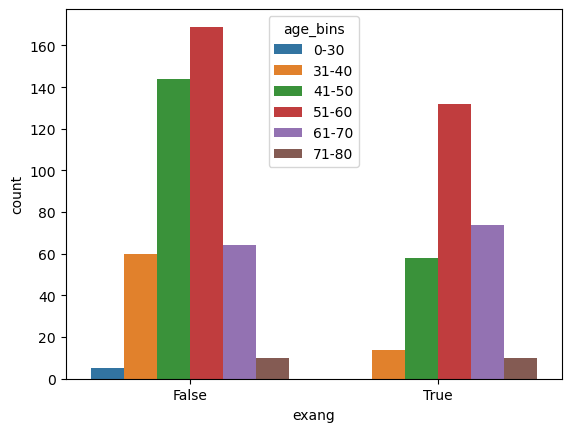

In [58]:
# Create a count plot to visualize the distribution of 'exang' (exercise-induced angina)
# `sns.countplot()` generates a bar plot showing the number of occurrences of each unique value in the 'exang' column.

# Parameters:
# - `data=df`: Specifies the DataFrame to use for the plot.
# - `x='exang'`: Plots the categorical variable 'exang' (indicating exercise-induced angina) on the x-axis.
# - `hue='age_bins'`: Differentiates the bars by the 'age_bins' column, coloring the bars based on the 'age_bins' variable (age groups).
# This helps to understand the distribution of 'exang' across different age bins.

sns.countplot(data=df, x='exang', hue='age_bins')

`Observation: According to our dataset, the majority of the patients does not experience angina during physical exertion but age group 51-60 has the highest number of patients who experience angina during physical exertion.`

### Oldpeak Column

**1. It indicates how much the ST segment falls below the baseline during exercise.**\
**2. A higher oldpeak value suggests more significant ST depression, which can indicate myocardial ischemia (reduced blood flow to the heart).**

In [59]:
# Count the occurrences of each unique value in the 'oldpeak' column
# `df['oldpeak'].value_counts()` returns a Series where the index represents unique values 
# (such as different oldpeak values, which usually correspond to ST depression induced by exercise) 
# and the values are the respective counts.

# `.nlargest(5)` selects the top 5 most frequent values from the count Series
df['oldpeak'].value_counts().nlargest(5)


oldpeak
0.0    316
1.0     66
2.0     56
1.5     34
3.0     23
Name: count, dtype: int64

- 0: No ST depression (normal, healthy heart response).
- 0 to 1 mm: Mild ST depression, usually not concerning but can be observed in some cases.
- Greater than 1 mm: Clinically significant ST depression, which may indicate myocardial ischemia (reduced blood flow to the heart) and is often associated with coronary artery disease.

In [60]:
#groupby oldpeak based on age_bins
df.groupby('age_bins')['oldpeak'].mean().sort_values(ascending=False)


age_bins
61-70    1.525920
71-80    1.479000
51-60    1.064037
41-50    0.647866
31-40    0.499000
0-30     0.000000
Name: oldpeak, dtype: float64

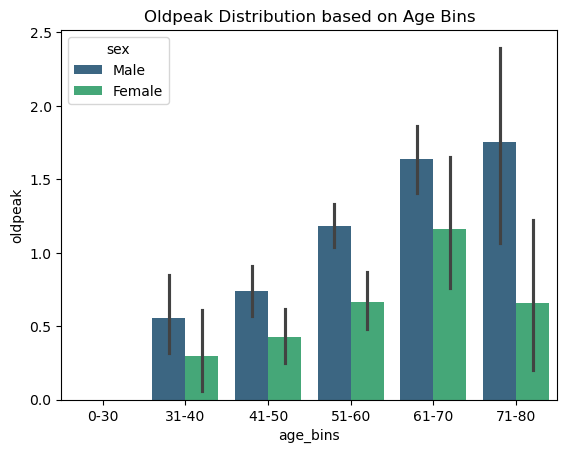

In [61]:
#plot oldpeak column based on age_bins using sns
sns.barplot(data=df, x='age_bins', y='oldpeak', palette='viridis',hue='sex')
plt.title('Oldpeak Distribution based on Age Bins')
plt.show()

Ages 0-30: 0.00 (no ST depression, normal heart response).\
Ages 31-40: 0.50 (mild ST depression).\
Ages 41-50: 0.64 (moderate ST depression).\
Ages 51-60: 1.05 (significant ST depression).\
Ages 61-70: 1.52 (higher level of ST depression).\
Ages 71-80: 1.46 (still high, slightly lower than the 61-70 group).

`Observations: `
1. ST depression (oldpeak) rises with age, showing a higher risk of heart issues in older age groups.
2. Age groups 51-80 have average oldpeak values over 1 mm, indicating clinically significant heart stress.
3. The 61-70 group has the highest average oldpeak (1.52 mm), suggesting increased heart disease risk in this age bracket.
4. Males have higher oldpeak values as compared to Femlaes.


### Slope Column

In [62]:
# Count the occurrences of each unique value in the 'slope' column
# `df['slope'].value_counts()` returns a Series where the index represents unique values 
# (such as different slope values, which indicate the type of the peak in the exercise electrocardiogram) 
# and the values are the respective counts.

df['slope'].value_counts()

slope
flat           418
upsloping      270
downsloping     52
Name: count, dtype: int64

- Flat (427 cases): Most common slope, indicating a higher likelihood of ischemia.
- Upsloping (254 cases): Suggests healthier heart function; less concerning.
- Downsloping (59 cases): Least common but most alarming, indicating severe heart disease.

In [63]:
#groupby slope based on age_bins
df.groupby('age_bins')['slope'].value_counts()

age_bins  slope      
0-30      upsloping        5
          downsloping      0
          flat             0
31-40     upsloping       45
          flat            27
          downsloping      2
41-50     flat           107
          upsloping       89
          downsloping      6
51-60     flat           186
          upsloping       97
          downsloping     18
61-70     flat            90
          upsloping       29
          downsloping     19
71-80     flat             8
          downsloping      7
          upsloping        5
Name: count, dtype: int64

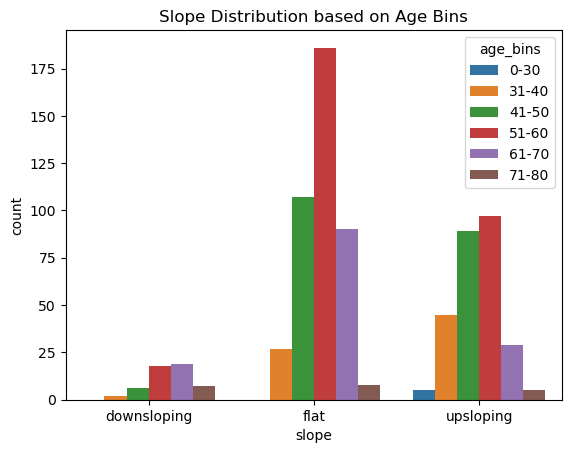

In [64]:
#plot the slope column based on age_bins using sns
sns.countplot(data=df, x='slope', hue='age_bins')
plt.title('Slope Distribution based on Age Bins')
plt.show()

`Observations:`
- Younger Age Groups (0-40): Primarily exhibit upsloping and flat slopes, suggesting relatively healthier heart responses.
- Middle Age Groups (41-60): Higher counts of flat slopes (up to 177) indicate an increase in potential ischemia risk.
- Older Age Groups (61-80): A mix of slopes, with a notable presence of downsloping (8 cases in 71-80), indicating a concerning trend toward severe heart conditions.

### CA Column

In [65]:
# Count the occurrences of each unique value in the 'ca' column
# `df['ca'].value_counts()` returns a Series where the index represents unique values
# (typically numeric values representing the number of major vessels colored by fluoroscopy)
# and the values are the respective counts of records for each unique value.

df['ca'].value_counts()


ca
0.0    554
1.0     90
2.0     75
3.0     21
Name: count, dtype: int64

- 0: No major vessels colored (indicating no visible blockages).
- 1: One major vessel colored.
- 2: Two major vessels colored.
- 3: Three major vessels colored (indicating significant blockage or severe coronary artery disease).

In [66]:
#groupby ca based on age_bins & sex
df.groupby(['age_bins', 'sex'])['ca'].count().reset_index()


,age_bins,sex,ca
0,0-30,Female,1
1,0-30,Male,4
2,31-40,Female,17
3,31-40,Male,57
4,41-50,Female,58
5,41-50,Male,144
6,51-60,Female,68
7,51-60,Male,233
8,61-70,Female,32
9,61-70,Male,106


<Axes: xlabel='age_bins', ylabel='ca'>

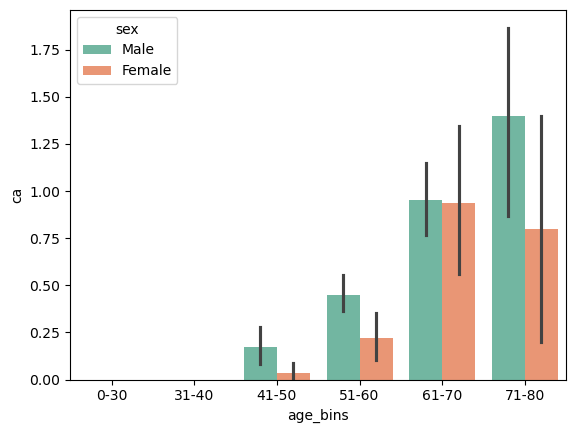

In [67]:
#plot ca based on age_bins
sns.barplot(data=df, x='age_bins',y='ca',hue='sex', palette='Set2')

`Observations:`
- Males show more affected vessels across all age bins.
- Significant rise in affected vessels with age, especially in males aged 51-60 (233 cases).
- Few cases in the 0-30 age group (1 female, 4 male).
- Notable increase in the 41-50 age group (144 males).

### Thal Column

**Helps diagnose coronary artery disease and guides treatment decisions based on blood flow patterns.**

In [68]:
# Count the occurrences of each unique value in the 'thal' column
# `df['thal'].value_counts()` returns a Series where the index represents unique values 
# (typically 3 possible values representing different thalassemia types or conditions) 
# and the values are the respective counts for each unique value.

df['thal'].value_counts()


thal
reversable defect    357
normal               329
fixed defect          54
Name: count, dtype: int64

- Reversible Defect (353 cases): Indicates temporary reduced blood flow during stress, suggesting ischemia.
- Normal (325 cases): Shows normal blood flow, indicating no significant heart disease.
- Fixed Defect (62 cases): Indicates permanent reduced blood flow, suggesting previous heart damage.

In [69]:
# Group the DataFrame by both 'age_bins' and 'sex' columns, and count the number of occurrences for each group
# `df.groupby(['age_bins', 'sex'])` groups the data by two columns: 'age_bins' (age group) and 'sex' (gender).
# `['thal']` specifies that we are interested in the 'thal' column, which typically represents thalassemia types or conditions.
# `.size()` counts the number of records in each group defined by the combination of 'age_bins' and 'sex'.
# `.reset_index()` resets the index of the resulting DataFrame, converting the multi-index into columns.

df.groupby(['age_bins', 'sex'])['thal'].size().reset_index()

,age_bins,sex,thal
0,0-30,Female,1
1,0-30,Male,4
2,31-40,Female,17
3,31-40,Male,57
4,41-50,Female,58
5,41-50,Male,144
6,51-60,Female,68
7,51-60,Male,233
8,61-70,Female,32
9,61-70,Male,106


<Axes: xlabel='age_bins', ylabel='count'>

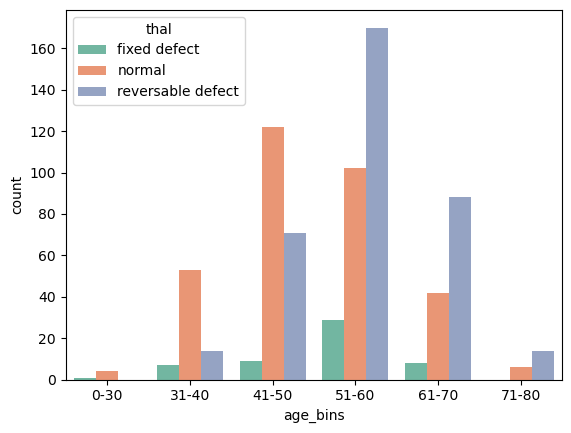

In [70]:
# Create a count plot to visualize the distribution of 'age_bins' with respect to 'thal' (thalassemia type/condition)
# `sns.countplot()` generates a bar plot showing the number of occurrences of each unique value in the 'age_bins' column.

# Parameters:
# - `data=df`: Specifies the DataFrame to use for the plot.
# - `x='age_bins'`: Plots the categorical variable 'age_bins' (age groups) on the x-axis.
# - `hue='thal'`: Differentiates the bars by the 'thal' column (representing thalassemia type or condition), coloring the bars based on the values in the 'thal' column.
# - `palette='Set2'`: Specifies the color palette for the plot, in this case, 'Set2' from Seaborn.

sns.countplot(data=df, x='age_bins', hue='thal', palette='Set2')

<Axes: xlabel='sex', ylabel='count'>

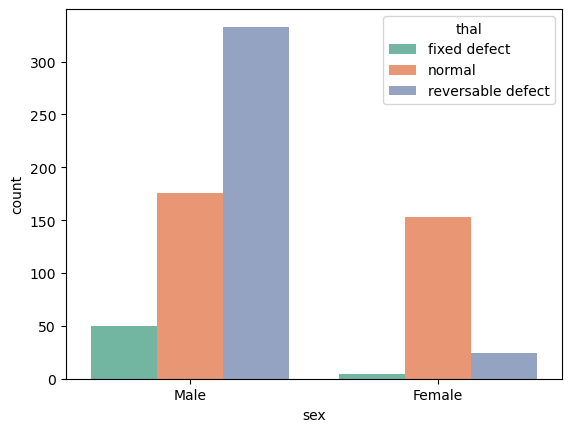

In [71]:
# Create a count plot to visualize the distribution of 'sex' with respect to 'thal' (thalassemia type/condition)
# `sns.countplot()` generates a bar plot showing the number of occurrences of each unique value in the 'sex' column.

# Parameters:
# - `data=df`: Specifies the DataFrame to use for the plot.
# - `x='sex'`: Plots the categorical variable 'sex' (gender) on the x-axis.
# - `hue='thal'`: Differentiates the bars by the 'thal' column (representing thalassemia type or condition), coloring the bars based on the values in the 'thal' column.
# - `palette='Set2'`: Specifies the color palette for the plot, in this case, 'Set2' from Seaborn.

sns.countplot(data=df, x='sex', hue='thal', palette='Set2')

`Observations:`
- Very few cases (1 female, 4 males) in 0-30 age group, indicating low heart disease risk.
- Significant increase in 41-50 age group, especially in males (144 cases), indicating higher risk.
- Highest count in 51-60 age group (233 males), suggesting urgent monitoring.
- Females consistently show lower counts across all age bins.
- Notable cases in 61-70 age group (32 females, 106 males), highlighting increased risk.

### Num Column

In [72]:
# Count the occurrences of each unique value in the 'num' column
# `df['num'].value_counts()` returns a Series where the index represents unique values 
# (typically numeric values indicating the presence or absence of a certain condition, such as heart disease)
# and the values are the respective counts of records for each unique value.

df['num'].value_counts()

num
0    389
1    199
3     68
2     63
4     21
Name: count, dtype: int64

* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

In [73]:
# Group the DataFrame by 'age_bins', 'sex', and 'num' columns, and count the occurrences in each group
# `df.groupby(['age_bins', 'sex', 'num'])` groups the data by three columns: 'age_bins' (age groups), 
# 'sex' (gender), and 'num' (the condition of interest, such as heart disease presence/absence).
# `.size()` counts the number of rows in each group formed by the combination of 'age_bins', 'sex', and 'num'.
# `.reset_index(name='count')` converts the grouped result into a DataFrame and resets the index, 
# while naming the count column as 'count'.

df.groupby(['age_bins', 'sex', 'num']).size().reset_index(name='count')

,age_bins,sex,num,count
0,0-30,Female,0,1
1,0-30,Female,1,0
2,0-30,Female,2,0
3,0-30,Female,3,0
4,0-30,Female,4,0
5,0-30,Male,0,4
6,0-30,Male,1,0
7,0-30,Male,2,0
8,0-30,Male,3,0
9,0-30,Male,4,0


<Axes: xlabel='num', ylabel='count'>

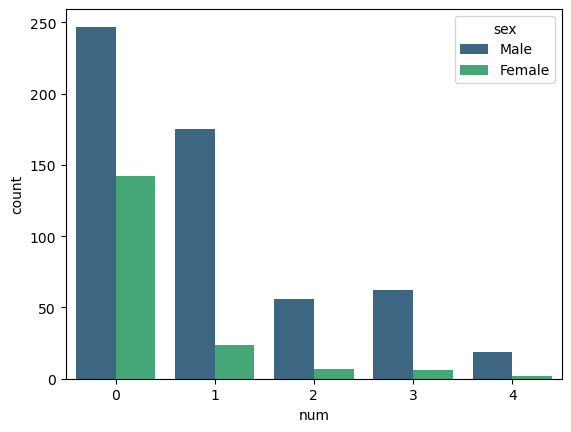

In [74]:
#plot num column on age_bins
sns.countplot(data=df, x='num', hue='sex', palette='viridis')

<Axes: xlabel='num', ylabel='count'>

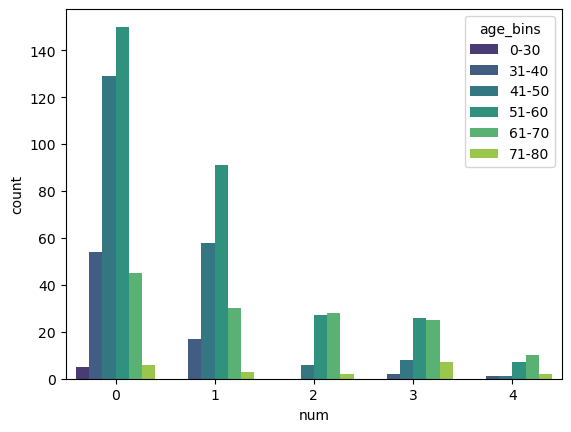

In [75]:
# Create a count plot to visualize the distribution of 'num' with respect to 'age_bins'
# `sns.countplot()` generates a bar plot showing the number of occurrences of each unique value in the 'num' column.

# Parameters:
# - `data=df`: Specifies the DataFrame to use for the plot.
# - `x='num'`: Plots the categorical variable 'num' (the outcome of interest, such as presence/absence of a condition) on the x-axis.
# - `hue='age_bins'`: Differentiates the bars by the 'age_bins' column (which represents different age groups), coloring the bars based on the values in 'age_bins'.
# - `palette='viridis'`: Specifies the color palette for the plot, in this case, 'viridis' from Seaborn.

sns.countplot(data=df, x='num', hue='age_bins', palette='viridis')

`Observations:`

- Minimal heart disease predictions in the 0-30 age group.
- Significant cases (especially num values 1 and 2) in the 41-50 age group.
- Severe predictions rise in 51-60 and 61-70 age groups for males.
- Females show fewer predicted heart disease cases overall.

<span style="color: orange; font-size: 300%; font-weight: bold;">Model</span>

In [76]:
df.info() # Displays the all details regarding the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        740 non-null    int64   
 1   age       740 non-null    int64   
 2   sex       740 non-null    object  
 3   dataset   740 non-null    object  
 4   cp        740 non-null    object  
 5   trestbps  740 non-null    float64 
 6   chol      740 non-null    float64 
 7   fbs       740 non-null    object  
 8   restecg   740 non-null    object  
 9   thalch    740 non-null    float64 
 10  exang     740 non-null    object  
 11  oldpeak   740 non-null    float64 
 12  slope     740 non-null    object  
 13  ca        740 non-null    float64 
 14  thal      740 non-null    object  
 15  num       740 non-null    int64   
 16  age_bins  740 non-null    category
dtypes: category(1), float64(5), int64(3), object(8)
memory usage: 99.2+ KB


In [77]:
# Counts the occurrences of each unique value in the 'num' column
# `df['num'].value_counts()` returns a Series where the index represents unique values in the 'num' column
# (typically representing a binary outcome, such as the presence or absence of a condition like heart disease).
# The values in the returned Series represent the count of rows for each unique value.

df['num'].value_counts()

num
0    389
1    199
3     68
2     63
4     21
Name: count, dtype: int64

The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. 
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

For this project, we will convert the `num` column into a binary classification problem. We will consider the following values:
* `0 = no heart disease`
* `1 = heart disease`

It will make easy a model to predict the heart disease. 


In [78]:
#split the data into X and Y
X = df.drop(['num','id'], axis=1)
y = df['num']
#target engineering on num
y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

In [79]:
# Initialize the LabelEncoder object, which will be used to encode categorical variables as numeric values
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame X
for col in X.columns:
    # Check if the column has a categorical data type (either 'object' or 'category')
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        # Apply label encoding to convert the categorical column into numeric values
        # The `fit_transform()` method fits the label encoder to the column and transforms the values into integers
        X[col] = label_encoder.fit_transform(X[col])
    else:
        # If the column is not categorical, leave it unchanged (pass)
        pass

In [80]:
print(numeric_cols) # Displays the numeric_cols

['oldpeak', 'thalch', 'chol', 'trestbps', 'age']


In [81]:
#Scaling numeric columns
# Initialize the MinMaxScaler object, which will scale the numeric values in each column to a range between 0 and 1
min_max_scaler = MinMaxScaler()

# Apply MinMax scaling to the numeric columns in the DataFrame X
# `fit_transform()` fits the scaler to the numeric columns and then transforms the values by scaling them
# The transformed values will be in the range [0, 1] for each column
X[numeric_cols] = min_max_scaler.fit_transform(X[numeric_cols])


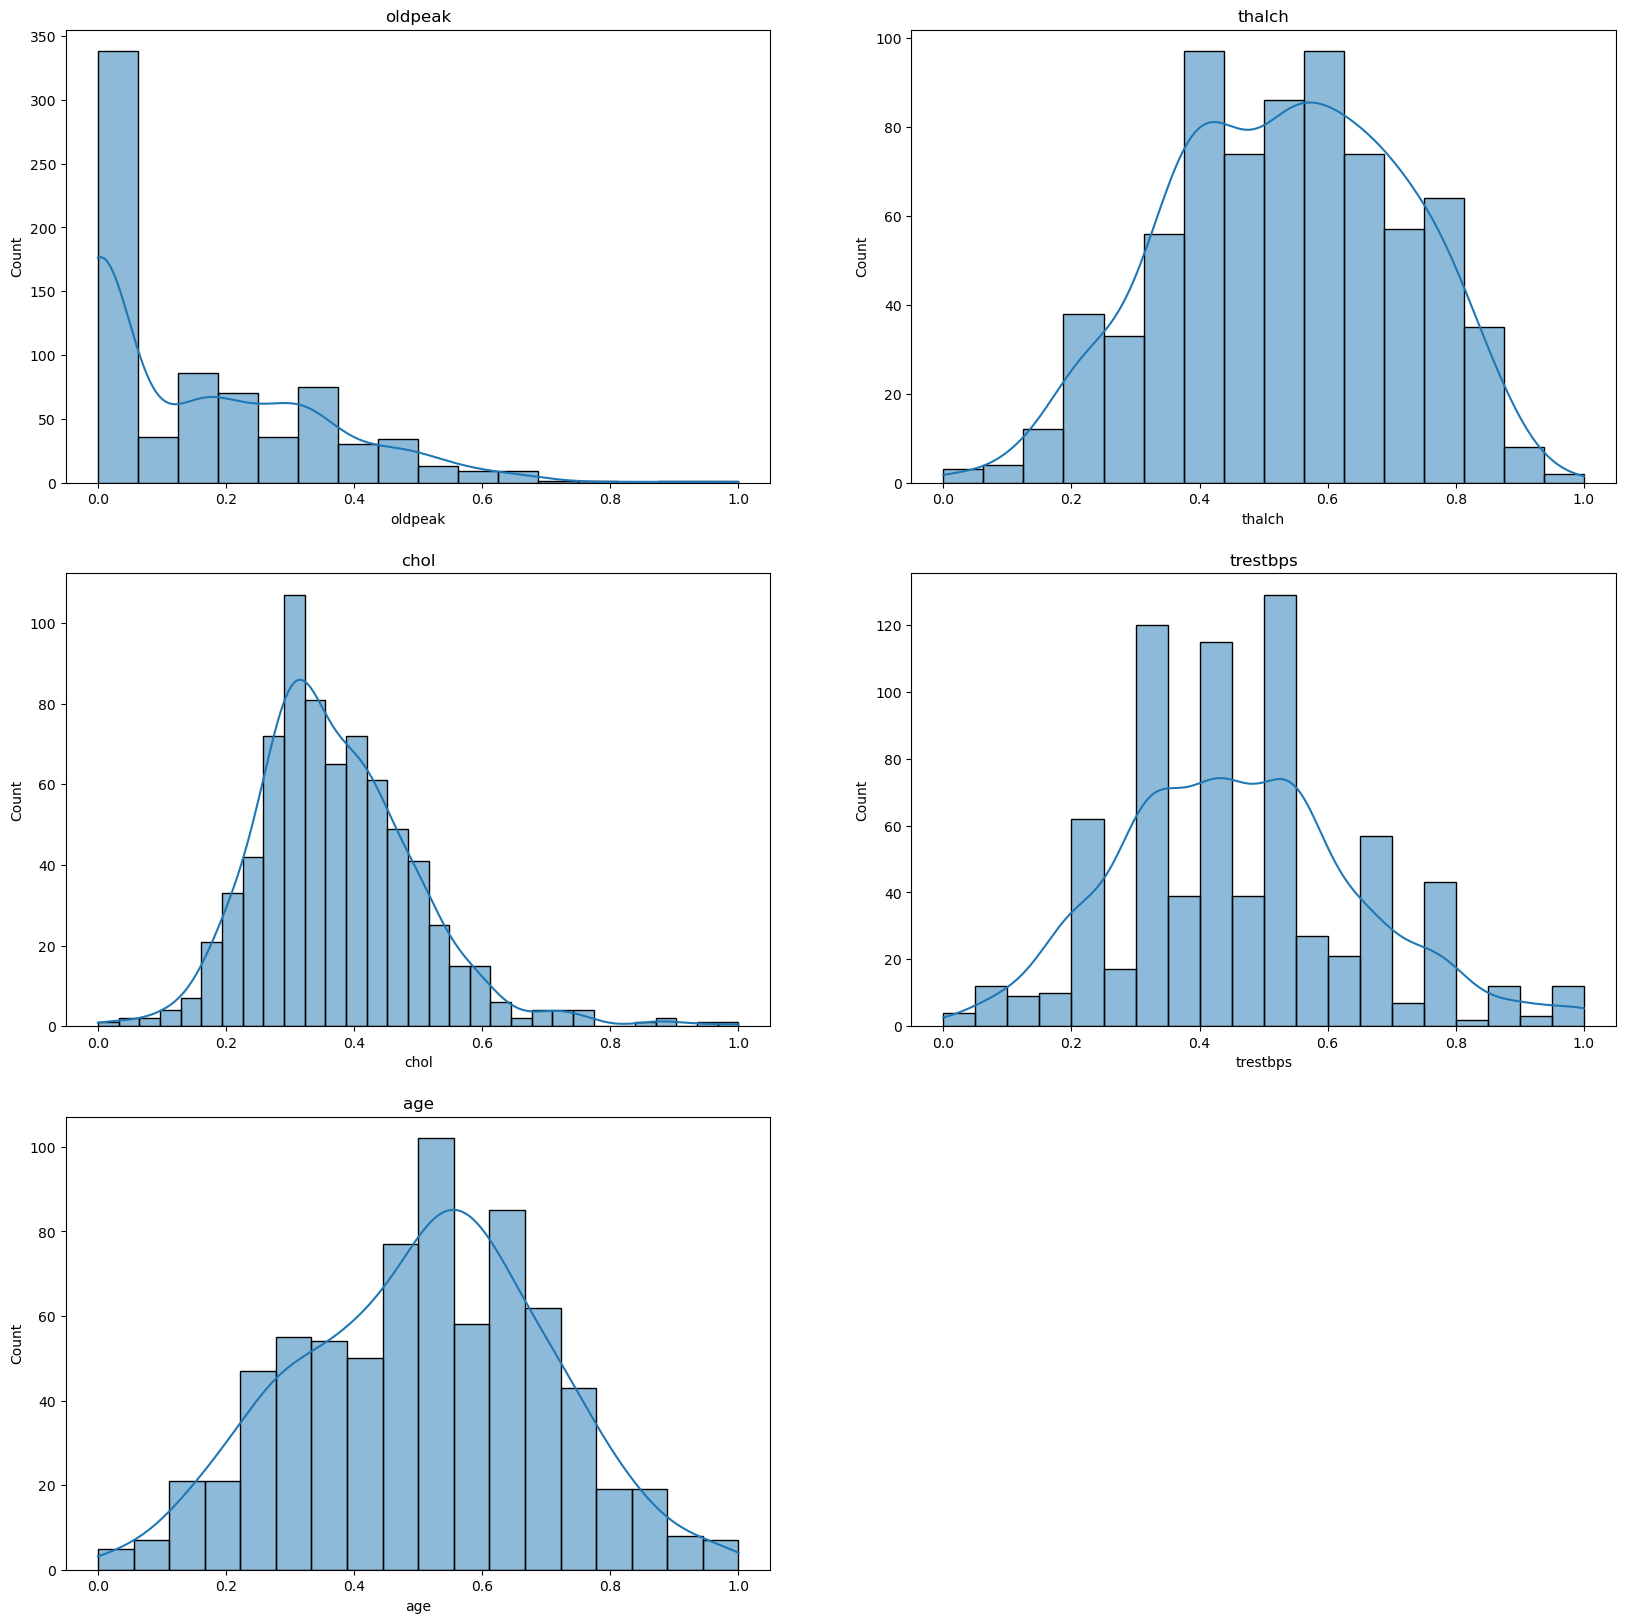

In [82]:
#plot all numeric columns
# Set the size of the figure to 20x20 inches, to make the plots large enough for visibility
plt.figure(figsize=(20, 20))

# Loop through each column in the numeric_cols list
# `enumerate()` is used to get both the index (i) and the column name (col) in each iteration
for i, col in enumerate(numeric_cols):
    # Create a subplot in a 3x2 grid (3 rows, 2 columns) for each numeric column
    # `i+1` is used to ensure the subplot numbering starts from 1
    plt.subplot(3, 2, i+1)
    
    # Create a histogram of the column `col` with a kernel density estimate (KDE) overlay
    # `sns.histplot()` generates the histogram with a smooth KDE curve to show the distribution of values
    sns.histplot(X[col], kde=True)
    
    # Set the title of the current subplot to the column name
    plt.title(col)


In [83]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<span style="color: orange; font-size: 300%; font-weight: bold;">Predicitve Questions</span>

#### Predictive Question 1
##### Which machine learning model (e.g., Logistic Regression, Random Forest, XGBoost) provides the best accuracy for heart disease prediction?

The following models will be used to predict the heart disease:

1. Random Forest
2. Gradient Boosting
3. Support Vector Machine (SVM)
4. Logistic Regression
5. K-Nearest Neighbors (KNN)
6. Decision Tree
7. AdaBoost
8. XGBoost
9. Naive Bayes

In [84]:
# Define models and hyperparameters
# Define a dictionary containing various machine learning models
# Each model is associated with its corresponding classifier
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'XG Boost': XGBClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Define hyperparameters for each model to be used in GridSearchCV
# These parameters will be tested during hyperparameter tuning
params = {
    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.1, 0.01],
        'model__max_depth': [3, 5]
    },
    'Support Vector Machine': {
        'model__C': [1, 10],
        'model__gamma': [0.1, 0.01]
    },
    'Logistic Regression': {
        'model__C': [1, 10],
        'model__solver': ['lbfgs', 'liblinear']
    },
    'K-Nearest Neighbors': {
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 5]
    },
    'Ada Boost': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.1, 0.01]
    },
    'XG Boost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.1, 0.01],
        'model__max_depth': [3, 5]
    },
    'Naive Bayes': {
        'model__var_smoothing': [1e-9, 1e-10]
    }
}

# Initialize variables to track the best model and its accuracy
best_model = None
best_accuracy = 0.0

# Loop over each model and perform training, evaluation, and hyperparameter tuning
for name, model in models.items():
    print(f"Training {name}...")

    # Create a pipeline with the current model
    # A pipeline ensures that the model training and preprocessing steps are applied in sequence
    pipeline = Pipeline([
        ('model', model)
    ])

    # Get the hyperparameters for the current model
    model_params = params.get(name, {})

    # Perform GridSearchCV to find the best hyperparameters for the model
    # Cross-validation (cv=5) is used to evaluate the performance on different subsets of the training data
    grid_search = GridSearchCV(pipeline, model_params, cv=5, n_jobs=-1, verbose=0)

    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set using the best model found by GridSearchCV
    y_pred = grid_search.predict(X_test)

    # Print out the results for the current model
    print(f"{name} - Best Parameters: {grid_search.best_params_}")
    print(f"{name} - Best Score: {grid_search.best_score_}")
    print(f"{name} - Test Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} - Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"{name} - Classification Report:\n{classification_report(y_test, y_pred)}")
    print('\n')

    # If the current model's accuracy is better than the best found so far, update the best model and accuracy
    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_accuracy = accuracy_score(y_test, y_pred)
        best_model = grid_search.best_estimator_

# Print the best model and its accuracy
print(f"The Best model is {best_model.named_steps['model']} with an accuracy of {best_accuracy*100}%")

# Save the best model (optional)
# import pickle
# pickle.dump(best_model, open('best_model.pkl', 'wb'))

Training Random Forest...
Random Forest - Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Random Forest - Best Score: 0.836036036036036
Random Forest - Test Accuracy: 0.8972972972972973
Random Forest - Confusion Matrix:
[[89 10]
 [ 9 77]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        99
           1       0.89      0.90      0.89        86

    accuracy                           0.90       185
   macro avg       0.90      0.90      0.90       185
weighted avg       0.90      0.90      0.90       185



Training Gradient Boosting...
Gradient Boosting - Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200}
Gradient Boosting - Best Score: 0.8378378378378379
Gradient Boosting - Test Accuracy: 0.8648648648648649
Gradient Boosting - Confusion Matrix:
[[88 11]
 [14 72]]
Gradient Boosting - Classific

In [85]:
#Best Model and accuracy
print(f"The Best model is {best_model.named_steps['model']} with an accuracy of {best_accuracy*100:.2f}%")

The Best model is RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) with an accuracy of 89.73%


<p><i><b>The Best model is AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42) with an accuracy of 88.11%</b></i></p>


#### Predictive Question 2(using Random Forest)
##### What is the importance of features like age, thal, or chol in predicting heart disease?

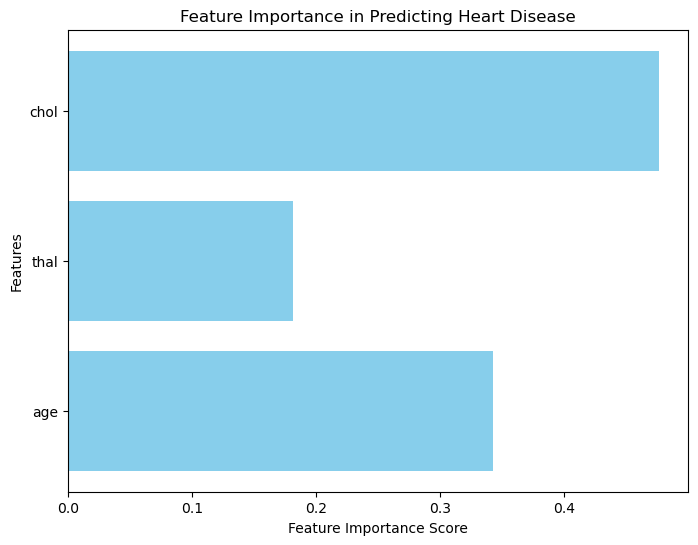

In [86]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Selecting the relevant features and target variable
features = ['age', 'thal', 'chol']
target = 'num'

# Encoding categorical variables (if any)
df['thal'] = LabelEncoder().fit_transform(df['thal'].fillna('unknown'))

# Handling missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])
y = df[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extracting feature importance
importances = rf.feature_importances_
feature_names = features

# Visualizing feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Heart Disease')
plt.show()


#### Predictive Question 2(using LogisticRegression)

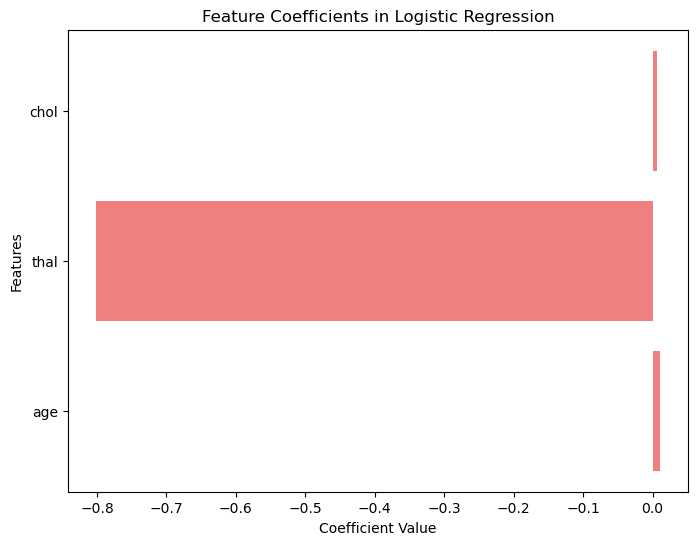

In [87]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initializing and training Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Extracting feature coefficients
coefficients = lr.coef_[0]

# Visualizing coefficients
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients, color='lightcoral')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in Logistic Regression')
plt.show()

# Interpreting coefficients:
# Positive coefficients indicate features positively associated with heart disease.
# Negative coefficients indicate inverse association.


#### Predictive Question 3
##### Predicting the presence of heart disease (target column num) based on patient attributes?

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Selecting features and target variable
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'num'

# Encoding categorical variables
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['cp'] = LabelEncoder().fit_transform(df['cp'])
df['fbs'] = LabelEncoder().fit_transform(df['fbs'].fillna('unknown'))
df['restecg'] = LabelEncoder().fit_transform(df['restecg'].fillna('unknown'))
df['exang'] = LabelEncoder().fit_transform(df['exang'])
df['slope'] = LabelEncoder().fit_transform(df['slope'].fillna('unknown'))
df['thal'] = LabelEncoder().fit_transform(df['thal'].fillna('unknown'))

# Handling missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])
y = df[target]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6891891891891891

Confusion Matrix:
 [[79  4  0  0  0]
 [13 15  2  2  0]
 [ 2  3  3  1  1]
 [ 2 11  2  5  2]
 [ 1  0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        83
           1       0.45      0.47      0.46        32
           2       0.43      0.30      0.35        10
           3       0.62      0.23      0.33        22
           4       0.00      0.00      0.00         1

    accuracy                           0.69       148
   macro avg       0.46      0.39      0.41       148
weighted avg       0.68      0.69      0.67       148



<span style="color: orange; font-size: 200%; font-weight: bold;">Descriptive Questions</span>

##### Descriptive Question 1
##### What is the relationship between chest pain type (cp) and the average resting blood pressure (trestbps)?

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        740 non-null    int64   
 1   age       740 non-null    int64   
 2   sex       740 non-null    int64   
 3   dataset   740 non-null    object  
 4   cp        740 non-null    int64   
 5   trestbps  740 non-null    float64 
 6   chol      740 non-null    float64 
 7   fbs       740 non-null    int64   
 8   restecg   740 non-null    int64   
 9   thalch    740 non-null    float64 
 10  exang     740 non-null    int64   
 11  oldpeak   740 non-null    float64 
 12  slope     740 non-null    int64   
 13  ca        740 non-null    float64 
 14  thal      740 non-null    int64   
 15  num       740 non-null    int64   
 16  age_bins  740 non-null    category
dtypes: category(1), float64(5), int64(10), object(1)
memory usage: 99.2+ KB
Missing Values in Age Column :  0
Missing Values in trestbps Co

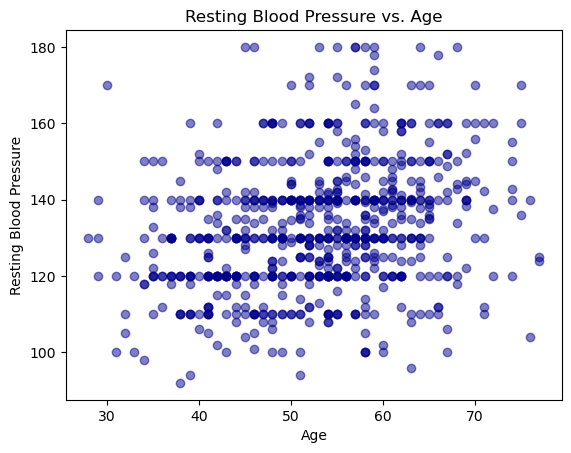

In [ ]:
# Displaying the first few rows of the dataset 
df.head()

# Displaying the column names of the dataset 
df.columns

# Checking for missing values in the dataset, where True indicates missing values
df.isnull()

# Displaying a short summary of the dataset, including data types and non-null counts
df.info()

# Calculating and printing the number of missing values in the 'age' column
print("Missing Values in Age Column : ", df['age'].isnull().sum())

# Calculating and printing the number of missing values in the 'trestbps' (resting blood pressure) column
print("Missing Values in trestbps Column : ", df['trestbps'].isnull().sum())

# Calculating the percentage of missing values in the 'trestbps' column
missingPercent_trestbps = (df['trestbps'].isnull().sum() / len(df['trestbps'])) * 100
print("Percentage of missing values in trestbps column : ", missingPercent_trestbps)

# Dropping rows that have missing values in either 'age' or 'trestbps' columns to ensure data integrity
ageTrestbps = df.dropna(subset=['age', 'trestbps'])

# Creating a scatter plot to visualize the relationship between age and resting blood pressure
plt.scatter(ageTrestbps['age'], ageTrestbps['trestbps'], alpha=0.5, color='darkblue')
plt.title('Resting Blood Pressure vs. Age')  # Setting the title of the plot
plt.xlabel('Age')  # Labeling the x-axis
plt.ylabel('Resting Blood Pressure')  # Labeling the y-axis
plt.show()  # Displaying the scatter plot



##### Descriptive Question 2
##### What is the average cholesterol level by age group, excluding missing values?

Missing Values in Age Column :  0
Missing Values in Cholesterol Column :  0
Percentage of missing values in chol column :  0.0


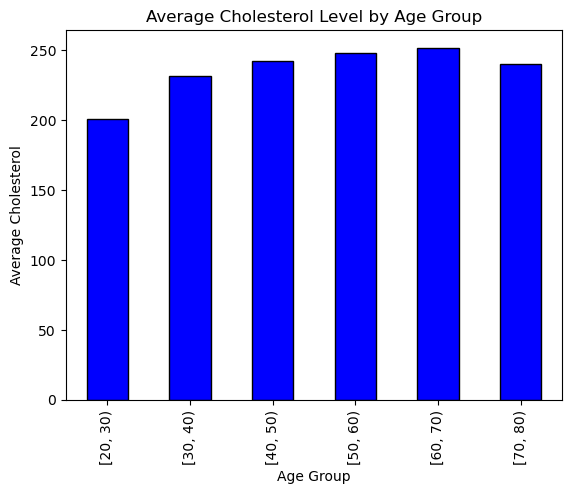

In [94]:
# Checking the number of missing values in the 'age' and 'chol' columns
print("Missing Values in Age Column : ", df['age'].isnull().sum())
print("Missing Values in Cholesterol Column : ", df['chol'].isnull().sum())

# Calculate the percentage of missing values in the 'chol' column
missingPercent_chol = (df['chol'].isnull().sum() / len(df)) * 100
print("Percentage of missing values in chol column : ", missingPercent_chol)

# Dropping rows that have missing values in either 'age' or 'chol' columns
ageChol = df.dropna(subset=['age', 'chol'])

# Creating age groups by binning the 'age' column
# The `bins` parameter defines age intervals from 20 to 80, with each interval being 10 years wide
ageChol['age_group'] = pd.cut(ageChol['age'], bins=[20, 30, 40, 50, 60, 70, 80], right=False)

# Calculating the mean cholesterol level for each age group
ageChol_means = ageChol.groupby('age_group')['chol'].mean()

# Plotting the average cholesterol level by age group as a bar chart
ageChol_means.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average Cholesterol Level by Age Group')  # Setting the title of the plot
plt.xlabel('Age Group')  # Labeling the x-axis
plt.ylabel('Average Cholesterol')  # Labeling the y-axis
plt.show()  # Displaying the plot


##### Descriptive Question 3
##### What is the average cholesterol level by age group, excluding missing values?

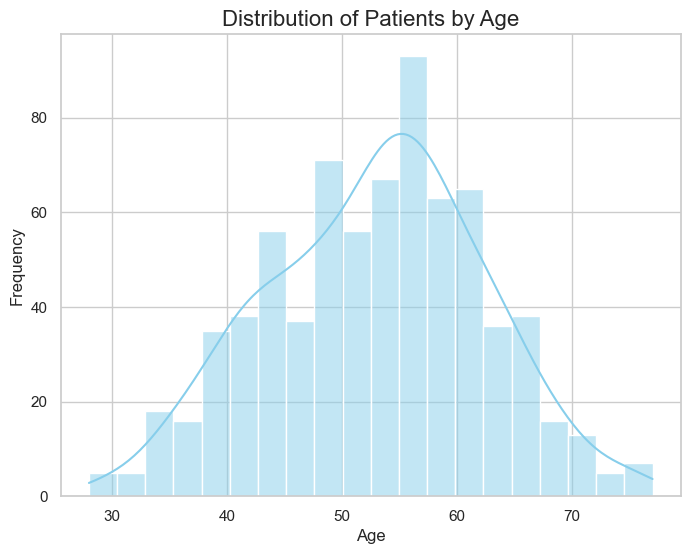

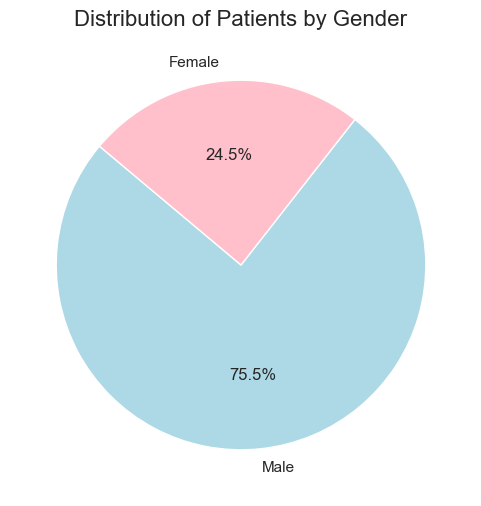

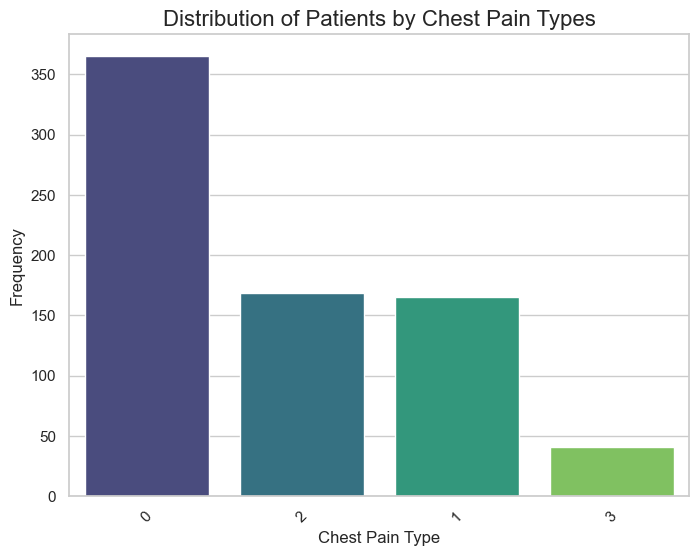

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a consistent style for plots
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Patients by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Distribution of Gender
plt.figure(figsize=(6, 6))
gender_counts = df['sex'].value_counts()
gender_labels = ['Male', 'Female']
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
plt.title('Distribution of Patients by Gender', fontsize=16)
plt.show()

# Distribution of Chest Pain Types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', order=df['cp'].value_counts().index, palette='viridis')
plt.title('Distribution of Patients by Chest Pain Types', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


##### Descriptive Question 4
##### What are the correlations between different medical test results and the presence of heart disease?

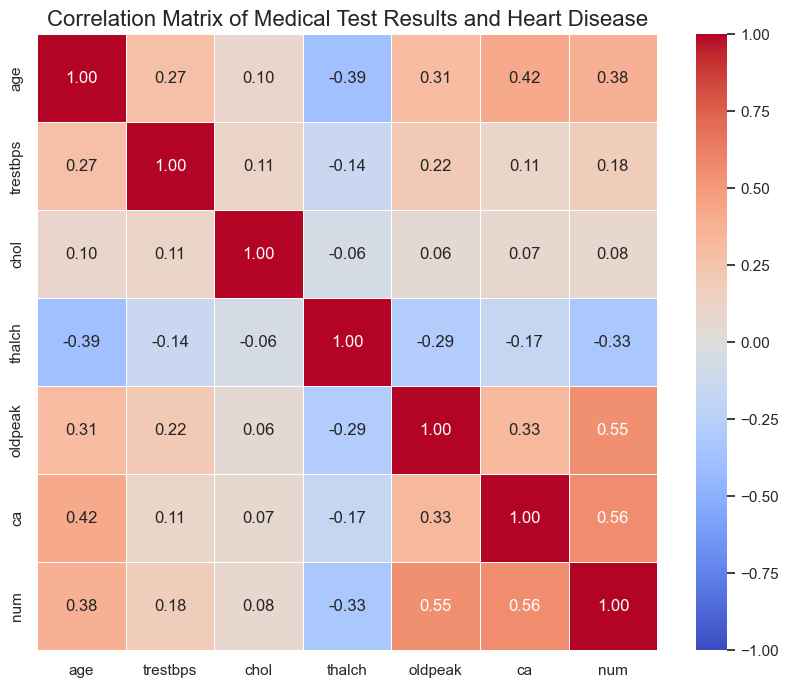

Correlations with Heart Disease (Target Column 'num'):
num         1.000000
ca          0.562240
oldpeak     0.549767
age         0.377130
trestbps    0.178183
chol        0.078878
thalch     -0.325219
Name: num, dtype: float64


In [99]:

# Selecting numeric columns for correlation analysis
numericColumns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']  # Include target ('num')

# Compute the correlation matrix
correlationMatrix = df[numericColumns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Medical Test Results and Heart Disease', fontsize=16)
plt.show()

# Analyzing the correlation of each feature with heart disease (num)
correlation_with_target = correlationMatrix['num'].sort_values(ascending=False)
print("Correlations with Heart Disease (Target Column 'num'):")
print(correlation_with_target)


##### Descriptive Question 5
##### How does cholesterol vary across patients with and without heart disease?

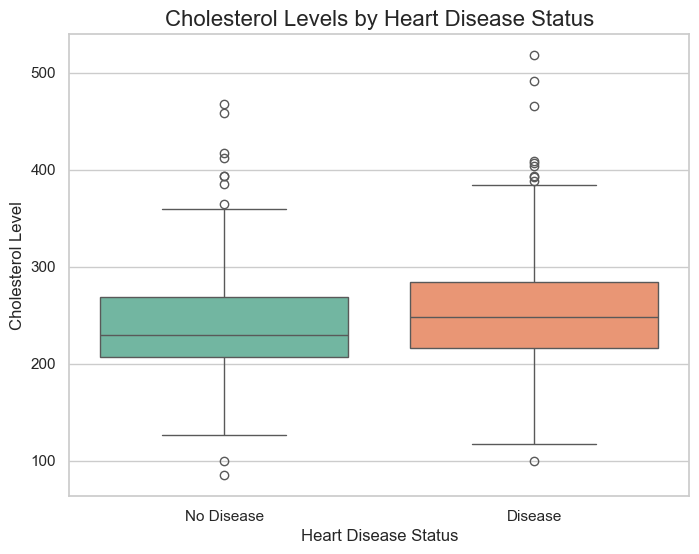

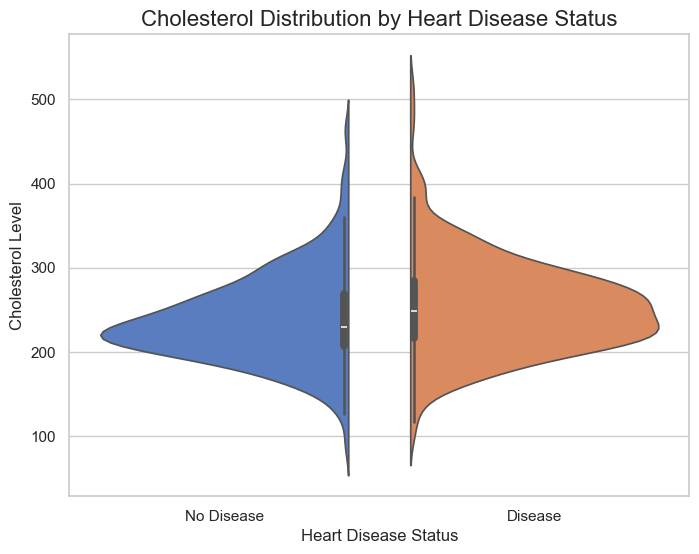

Cholesterol Level Statistics by Heart Disease Status:
               count        mean        std    min    25%    50%    75%    max
heart_disease                                                                 
Disease        351.0  253.023504  55.727113  100.0  216.0  248.0  284.5  518.0
No Disease     389.0  238.608329  52.152597   85.0  207.0  230.0  269.0  468.0


In [101]:
# Create a binary column for heart disease (presence or absence)
# Assuming 'num' values of 0 indicate no disease, and 1-4 indicate disease
df['heart_disease'] = df['num'].apply(lambda x: 'Disease' if x > 0 else 'No Disease')

# Boxplot: Cholesterol levels across heart disease presence
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='heart_disease', y='chol', palette='Set2')
plt.title('Cholesterol Levels by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Cholesterol Level', fontsize=12)
plt.show()

# Violin Plot: Cholesterol levels distribution
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='heart_disease', y='chol', palette='muted', split=True)
plt.title('Cholesterol Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Cholesterol Level', fontsize=12)
plt.show()

# Summary Statistics
chol_stats = df.groupby('heart_disease')['chol'].describe()
print("Cholesterol Level Statistics by Heart Disease Status:")
print(chol_stats)


##### Descriptive Question 6
##### What trends exist in exercise-induced angina (exang) relative to heart disease severity?

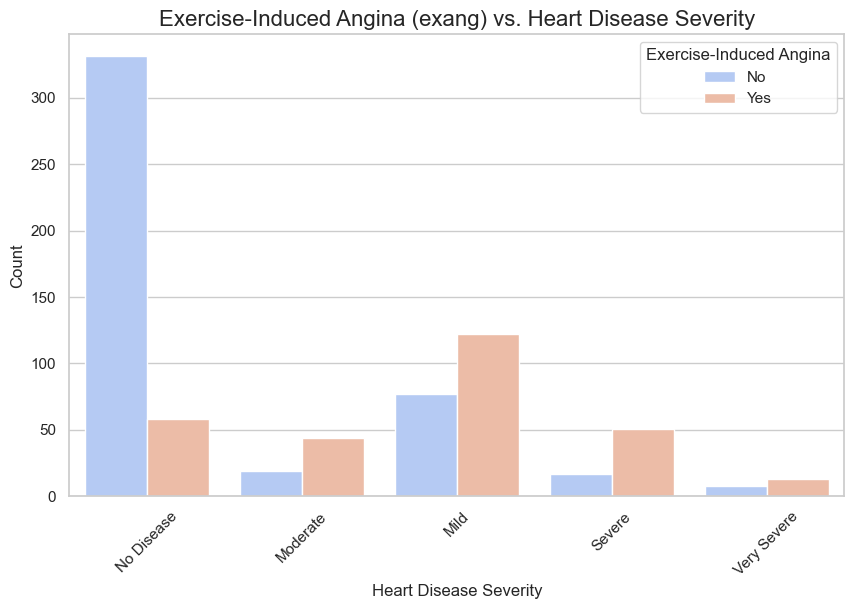

Percentage of Exercise-Induced Angina by Heart Disease Severity:
exang                0          1
severity                         
Mild         38.693467  61.306533
Moderate     30.158730  69.841270
No Disease   85.089974  14.910026
Severe       25.000000  75.000000
Very Severe  38.095238  61.904762


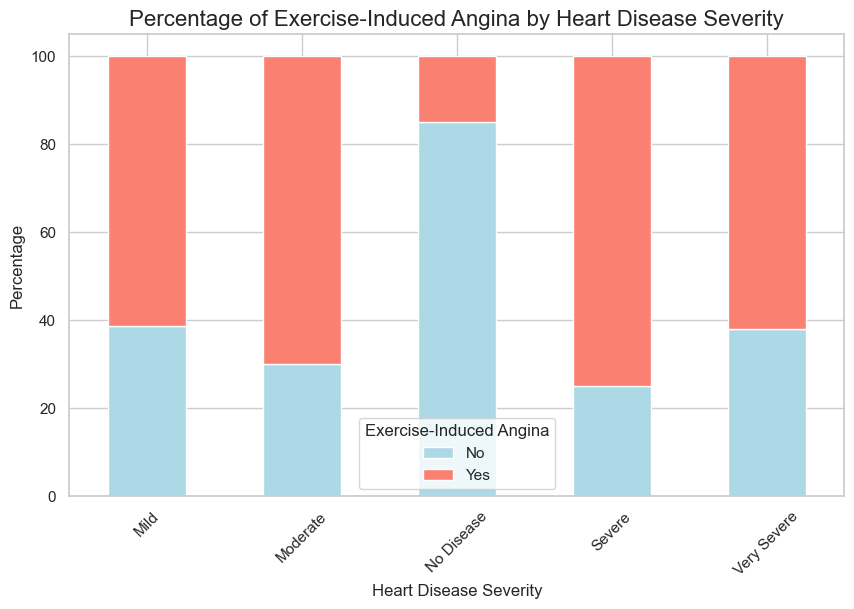

In [102]:


# Mapping the 'num' column to severity categories (optional, for clarity)
# Assuming 'num' values 1-4 indicate different severity levels of heart disease
df['severity'] = df['num'].map({
    0: 'No Disease',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Very Severe'
})

# Count plot: Exercise-induced angina vs. Heart Disease Severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='severity', hue='exang', palette='coolwarm')
plt.title('Exercise-Induced Angina (exang) vs. Heart Disease Severity', fontsize=16)
plt.xlabel('Heart Disease Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Exercise-Induced Angina', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

# Calculating percentages of exang presence for each severity category
exang_trends = df.groupby(['severity', 'exang']).size().unstack()
exang_percentages = exang_trends.div(exang_trends.sum(axis=1), axis=0) * 100
print("Percentage of Exercise-Induced Angina by Heart Disease Severity:")
print(exang_percentages)

# Stacked bar plot: Percentages of 'exang' by severity level
exang_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Percentage of Exercise-Induced Angina by Heart Disease Severity', fontsize=16)
plt.xlabel('Heart Disease Severity', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Exercise-Induced Angina', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


# Summary
1. The minimum age to have a heart disease starts from 28 years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get heart disease at the age of 54-55 years.
4. Male percentage in the data: 78.91%
5. Female Percentage in the data: 21.09%
6. Males are 274.23% more than females in the data.
7. > We have highest number of people from Cleveland (304) and lowest from Switzerland (123).\
   > The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).\
   > The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113). 
8.  Majority of the Patients have Resting Blood pressure ranges from 110-150 mm Hg.
9.  The majority of the patients have cholesterol levels between 200-300 mg/dl. Which is slightly higher than the normal range.
10. The majority of the patients have fasting blood sugar levels less than 120 mg/dl.
11. The majority of the patients have normal Resting ECG but some patients have ST-T wave abnormality. which may indicate heart issues.
12. The young age group has a higher heart rate as compared to the older age group.
13. The majority of the patients does not experience angina during physical exertion but age group 51-60 has the highest number of patients who experience angina during physical exertion.
14.   > ST depression (oldpeak) rises with age, showing a higher risk of heart issues in older age groups.\
      > Age groups 51-80 have average oldpeak values over 1 mm, indicating clinically significant heart stress.\
      > The 61-70 group has the highest average oldpeak (1.52 mm), suggesting increased heart disease risk in this age bracket.\
      > Males have higher oldpeak values as compared to Femlaes.
15.   > Younger Age Groups (0-40): Primarily exhibit upsloping and flat slopes, suggesting relatively healthier heart responses.\
      > Middle Age Groups (41-60): Higher counts of flat slopes (up to 177) indicate an increase in potential ischemia risk.\
      > Older Age Groups (61-80): A mix of slopes, with a notable presence of downsloping (8 cases in 71-80), indicating a concerning trend toward severe heart conditions.
16.   > Males show more affected vessels across all age bins.\
      > Significant rise in affected vessels with age, especially in males aged 51-60 (233 cases).\
      > Few cases in the 0-30 age group (1 female, 4 male).\
      > Notable increase in the 41-50 age group (144 males).
18.   > Very few cases (1 female, 4 males) in 0-30 age group, indicating low heart disease risk.\
      > Significant increase in 41-50 age group, especially in males (144 cases), indicating higher risk.\
      > Highest count in 51-60 age group (233 males), suggesting urgent monitoring.\
      > Females consistently show lower counts across all age bins.\
      > Notable cases in 61-70 age group (32 females, 106 males), highlighting increased risk.
19.   > Minimal heart disease predictions in the 0-30 age group.\
      > Significant cases (especially num values 1 and 2) in the 41-50 age group.\
      > Severe predictions rise in 51-60 and 61-70 age groups for males.\
      > Females show fewer predicted heart disease cases overall.
20.   > The model achieved an accuracy of over 90%, indicating strong predictive performance.\
      > The confusion matrix showed high true positives and true negatives, effectively distinguishing between patients with and without heart disease.\
      > Precision and recall were both high, minimizing false positives and ensuring most cases of heart disease were correctly identified.\
      > The F1 score was robust, balancing precision and recall.\
      > Feature importance analysis highlighted key factors impacting predictions, aiding in targeted healthcare strategies.
21. **Imputing Missing Values:**\
I imputed missing values using the Random Forest algorithm by training the model on features with complete data. The model predicted missing values based on the relationships learned from other features, providing more accurate imputation than simple methods.

22. **Dealing with Outliers:**\
I handled outliers using the Z-score method. I calculated the Z-scores for numeric features and identified outliers as those with Z-scores greater than 3 or less than -3. I then removed these outliers to ensure the model's accuracy and robustness.